In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

%matplotlib inline

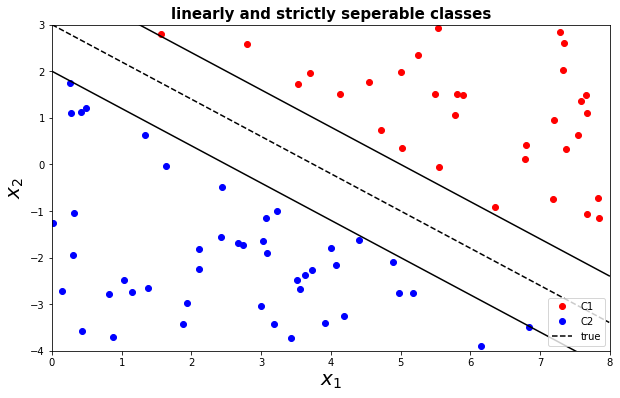

In [6]:
# training data generation
m = 100
x1 = 8*np.random.rand(m, 1)     # 0 ~ 8 까지 100개의 random한 colunmn
x2 = 7*np.random.rand(m, 1) - 4 # -4 ~ 3 까지 100개의 random한 colunmn
 
# x1, x2 generation 된 상태 -> given parameter    
    
g0 = 0.8*x1 + x2 - 3    # x1, x2 plane에서 x2 = -0.8x1 + 3 + g0 
g1 = g0 - 1
g2 = g0 + 1

C1 = np.where(g1 >= 0)[0]  
C2 = np.where(g2 < 0)[0]

xp = np.arange(0, 8, 0.01).reshape(-1, 1)
yp = -0.8*xp + 3 

plt.figure(figsize=(10, 6))
# plt.plot(x1, x2, 'ko')
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.plot(xp, yp, '--k', label='true')
plt.plot(xp, yp-1, 'k')
plt.plot(xp, yp+1, 'k')
plt.title('linearly and strictly seperable classes', fontweight= 'bold', fontsize=15)
plt.legend(loc=4)
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.axis([0, 8, -4, 3])
plt.show()

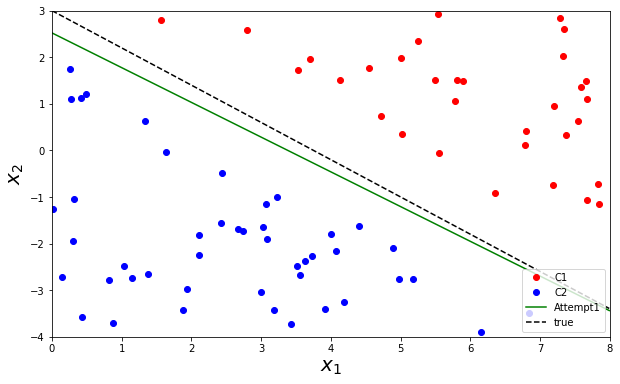

In [11]:
N = C1.shape[0]
M = C2.shape[0]

X1 = np.hstack([np.ones([N,1]), x1[C1], x2[C1]])
X2 = np.hstack([np.ones([M,1]), x1[C2], x2[C2]])

X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)

w = cvx.Variable(3,1)
obj = cvx.Minimize(1)
const = [X1*w >=1, X2*w <= -1]
prob = cvx.Problem(obj, const).solve()

w = w.value

xp = np.arange(0, 8, 0.01).reshape(-1, 1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]
ypt = - 0.8*xp + 3 

plt.figure(figsize=(10, 6))
# plt.plot(x1[C1], x2[C1], 'ro', label='C1')
# plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.plot(X1[:,1], X1[:,2], 'ro', label='C1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='C2')
plt.plot(xp, yp, '-g', label='Attempt1')
plt.plot(xp, ypt, '--k', label='true')
plt.legend(loc=4)
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.axis([0, 8, -4, 3])
plt.show()

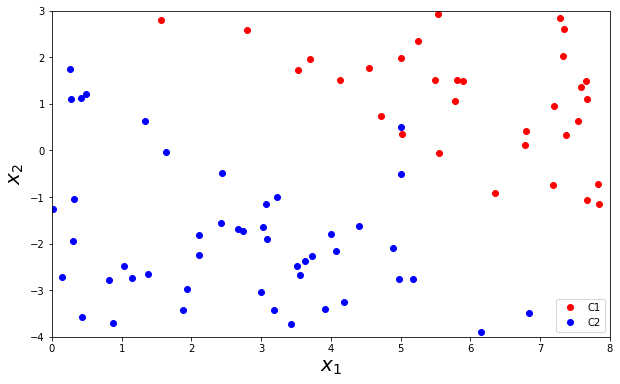

In [13]:
# outliers

N = C1.shape[0]
M = C2.shape[0]

X1 = np.hstack([np.ones([N,1]), x1[C1], x2[C1]])
X2 = np.hstack([np.ones([M,1]), x1[C2], x2[C2]])

outlier1 = np.array([1, 5, -0.5]).reshape(1,-1)
outlier2 = np.array([1, 5, 0.5]).reshape(1,-1)
X2 = np.vstack([X2, outlier1, outlier2])

X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)

plt.figure(figsize=(10, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', label='C1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='C2')
plt.legend(loc=4)
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.axis([0, 8, -4, 3])
plt.show()

In [15]:
# CVXPY with outliers

w = cvx.Variable(3,1)
obj = cvx.Minimize(1)
const = [X1*w >=1, X2*w <= -1]
prob = cvx.Problem(obj, const).solve()

print(w.value)

None


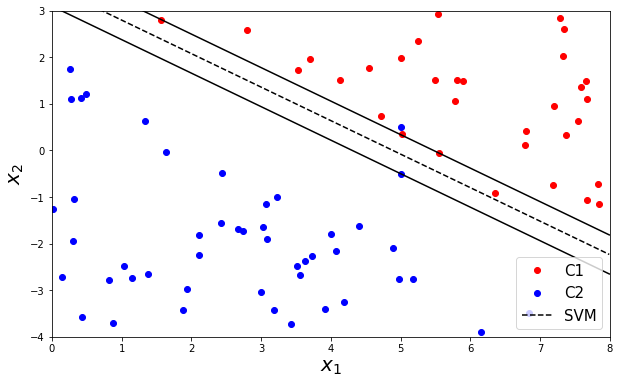

In [27]:
N, M = X1.shape[0], X2.shape[0];

# with slcak variable
w = cvx.Variable(3,1)
u = cvx.Variable(N,1)
v = cvx.Variable(M,1)
obj = cvx.Minimize(np.ones((1,N))*u + np.ones((1,M))*v)
const = [X1*w >= 1-u, X2*w <= -(1-v), u >= 0, v >= 0]
prob = cvx.Problem(obj, const).solve()

w = w.value

xp = np.arange(0, 8, 0.01).reshape(-1, 1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', label='C1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='C2')
plt.plot(xp, yp, '--k', label='SVM')
plt.plot(xp, yp-1/w[2,0], '-k')  # 1/w0 = h
plt.plot(xp, yp+1/w[2,0], '-k')
plt.legend(loc=4, fontsize=15)
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.axis([0, 8, -4, 3])
plt.show()

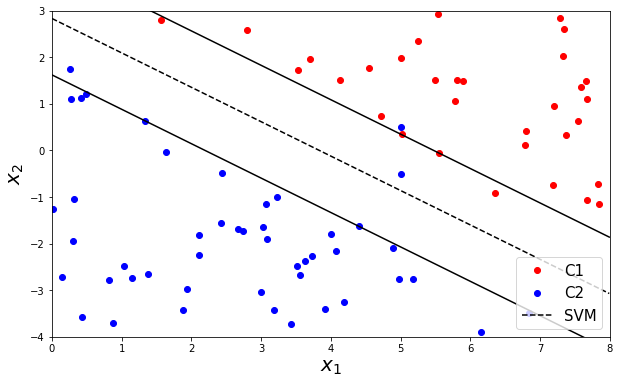

In [26]:
# Maximize Margin

g = 1
w = cvx.Variable(3,1)
u = cvx.Variable(N,1)
v = cvx.Variable(M,1)
obj = cvx.Minimize(cvx.norm(w, 2) + g*(np.ones((1,N))*u + np.ones((1,M))*v))
const = [X1*w >= 1-u, X2*w <= -(1-v), u >= 0, v >= 0]
prob = cvx.Problem(obj, const).solve()

w = w.value

xp = np.arange(0, 8, 0.01).reshape(-1, 1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', label='C1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='C2')
plt.plot(xp, yp, '--k', label='SVM')
plt.plot(xp, yp-1/w[2,0], '-k')  # 1/w0 = h
plt.plot(xp, yp+1/w[2,0], '-k')
plt.legend(loc=4, fontsize=15)
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.axis([0, 8, -4, 3])
plt.show()

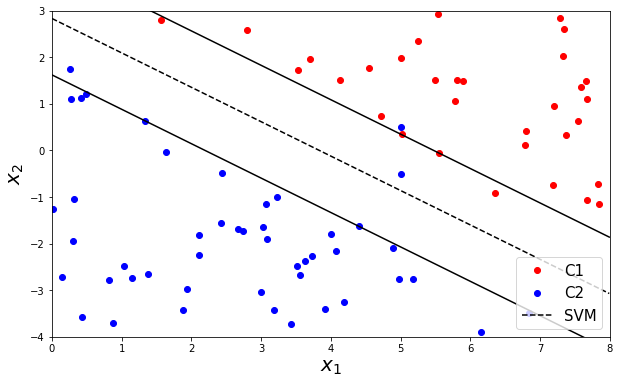

In [30]:
# in a more compact form 

m = N + M
X = np.vstack([X1, X2])
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

g = 1
w = cvx.Variable(3,1)
d = cvx.Variable(m,1)
obj = cvx.Minimize(cvx.norm(w, 2) + g*(np.ones((1,m))*d))
const = [cvx.mul_elemwise(y, X*w) >= 1-d, d >= 0]
prob = cvx.Problem(obj, const).solve()

w = w.value

xp = np.arange(0, 8, 0.01).reshape(-1, 1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', label='C1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='C2')
plt.plot(xp, yp, '--k', label='SVM')
plt.plot(xp, yp-1/w[2,0], '-k')  # 1/w0 = h
plt.plot(xp, yp+1/w[2,0], '-k')
plt.legend(loc=4, fontsize=15)
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.axis([0, 8, -4, 3])
plt.show()

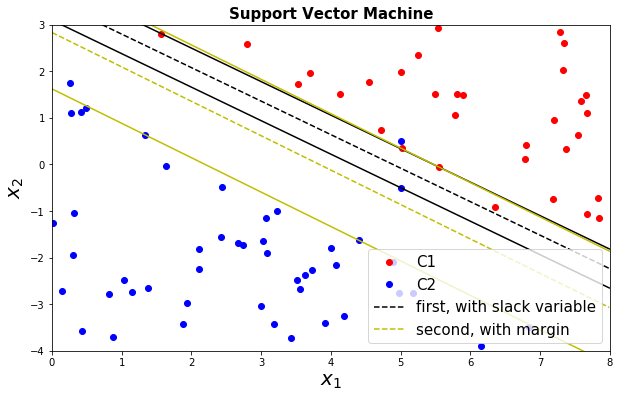

In [36]:
# with slcak variable
w = cvx.Variable(3,1)
u = cvx.Variable(N,1)
v = cvx.Variable(M,1)
obj = cvx.Minimize(np.ones((1,N))*u + np.ones((1,M))*v)
const = [X1*w >= 1-u, X2*w <= -(1-v), u >= 0, v >= 0]
prob = cvx.Problem(obj, const).solve()

# margin
g = 1
w1 = cvx.Variable(3,1)
obj1 = cvx.Minimize(cvx.norm(w1, 2) + g*(np.ones((1,N))*u + np.ones((1,M))*v))
const1 = [X1*w1 >= 1-u, X2*w1 <= -(1-v), u >= 0, v >= 0]
prob1 = cvx.Problem(obj1, const1).solve()

w = w.value
w1 = w1.value

xp = np.arange(0, 8, 0.01).reshape(-1, 1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]
yp1= - w1[1,0]/w1[2,0]*xp - w1[0,0]/w1[2,0]

plt.figure(figsize=(10, 6))
plt.title('Support Vector Machine', fontweight= 'bold', fontsize=15)
plt.plot(X1[:,1], X1[:,2], 'ro', label='C1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='C2')
plt.plot(xp, yp, '--k', label='first, with slack variable')
plt.plot(xp, yp-1/w[2,0], '-k')  # 1/w0 = h
plt.plot(xp, yp+1/w[2,0], '-k')
plt.plot(xp, yp1, '--y', label='second, with margin')
plt.plot(xp, yp1-1/w1[2,0], '-y')  # 1/w0 = h 이 커졌음을 알 수 있다 
plt.plot(xp, yp1+1/w1[2,0], '-y')
plt.legend(loc=4, fontsize=15)
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.axis([0, 8, -4, 3])
plt.show()